In [27]:
import pyaudio
import numpy as np
from matplotlib import pyplot as plt

listener = pyaudio.PyAudio()

n_apis = listener.get_host_api_count()
apis = []
for i_api in range(n_apis):
    api = listener.get_host_api_info_by_index(i_api)
    apis.append(api['name'])

print('APIs:', apis)

n_devices = listener.get_device_count()
devices = []
for i_device in range(n_devices):
    device = listener.get_device_info_by_index(i_device)
    if apis[device['hostApi']] == 'ALSA':
        devices.append((i_device, device['name']))


print('Devices:', devices)

APIs: ['ALSA', 'OSS']
Devices: [(0, 'sof-hda-dsp: - (hw:0,0)'), (1, 'sof-hda-dsp: - (hw:0,3)'), (2, 'sof-hda-dsp: - (hw:0,4)'), (3, 'sof-hda-dsp: - (hw:0,5)'), (4, 'sof-hda-dsp: - (hw:0,6)'), (5, 'sof-hda-dsp: - (hw:0,7)'), (6, 'sof-hda-dsp: - (hw:0,31)'), (7, 'micArray RAW SPK: USB Audio (hw:1,0)'), (8, 'sysdefault'), (9, 'lavrate'), (10, 'samplerate'), (11, 'speexrate'), (12, 'jack'), (13, 'pipewire'), (14, 'pulse'), (15, 'speex'), (16, 'upmix'), (17, 'vdownmix'), (18, 'dmix'), (19, 'default')]


In [28]:
i_device = 7
device = listener.get_device_info_by_index(i_device)
print('Device:', device)

Device: {'index': 7, 'structVersion': 2, 'name': 'micArray RAW SPK: USB Audio (hw:1,0)', 'hostApi': 0, 'maxInputChannels': 8, 'maxOutputChannels': 2, 'defaultLowInputLatency': 0.008684807256235827, 'defaultLowOutputLatency': 0.008684807256235827, 'defaultHighInputLatency': 0.034829931972789115, 'defaultHighOutputLatency': 0.034829931972789115, 'defaultSampleRate': 44100.0}


In [29]:
n_channels = device['maxInputChannels']
fs = int(device['defaultSampleRate'])

print('Number of Channels:', n_channels)
print('Sampling Rate:', fs)

Number of Channels: 8
Sampling Rate: 44100


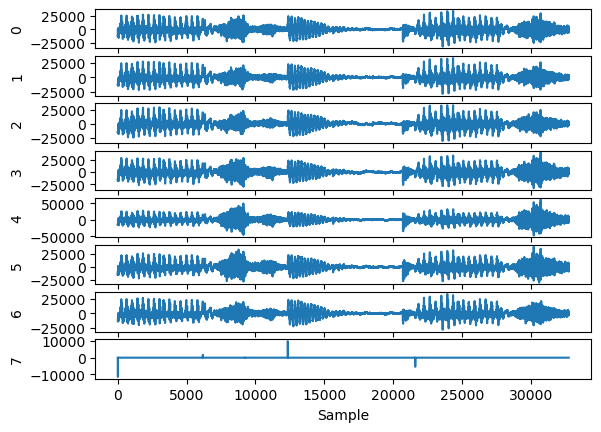

In [30]:
n_samples = 1024*32

stream = listener.open(
    rate=fs,
    channels=n_channels,
    format=pyaudio.paFloat32,
    input=True,
    input_device_index=i_device,
    frames_per_buffer=1024
)

buffer = stream.read(n_samples)
stream.stop_stream()
stream.close()

data = np.frombuffer(buffer, dtype=np.float32)
data = data.reshape((n_samples, n_channels))

# plot each channel
plt.subplot(n_channels, 1, 1)
for i_channel in range(n_channels):
    plt.subplot(n_channels, 1, i_channel+1)
    plt.plot((2 << 23)*data[:, i_channel])
    plt.ylabel(f'{i_channel}')
plt.xlabel('Sample')
plt.show()

In [31]:
listener.terminate()